**Obligatoriskt att fylla i uppgifterna nedan.**

Namn: Linus Rundberg Streuli

Vem du har presenterat för: Missy och Marcus

Datum då du presenterade: 2024-05-08

**Kunskapskontrollen lämnas in på Omniway.**

**It is possible to load pretrained models which is a powerful concept.**

Model implementation: 
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [1]:
#| label: imports-and-model-load
#| echo: false

import os
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

model = ResNet50(weights='imagenet')

2024-05-08 16:19:15.839827: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 16:19:22.520836: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [2]:
#| label: import-and-preprocess-images
#| echo: false

img_paths = []

with os.scandir('images/') as files:
    for entry in files:
        if entry.name.endswith('jpg'):
            img_paths.append(os.path.join('images', entry.name))

imgs = [image.load_img(img, target_size=(224, 224)).rotate(-90) for img in img_paths]

x = np.array([image.img_to_array(img) for img in imgs])
x = preprocess_input(x)

In [3]:
x.shape

(12, 224, 224, 3)

In [4]:
#| label: predict
#| echo: false
preds = model.predict(x)
predictions = np.array(decode_predictions(preds, top=3))


1/1 [==============================] - 7s 7s/step


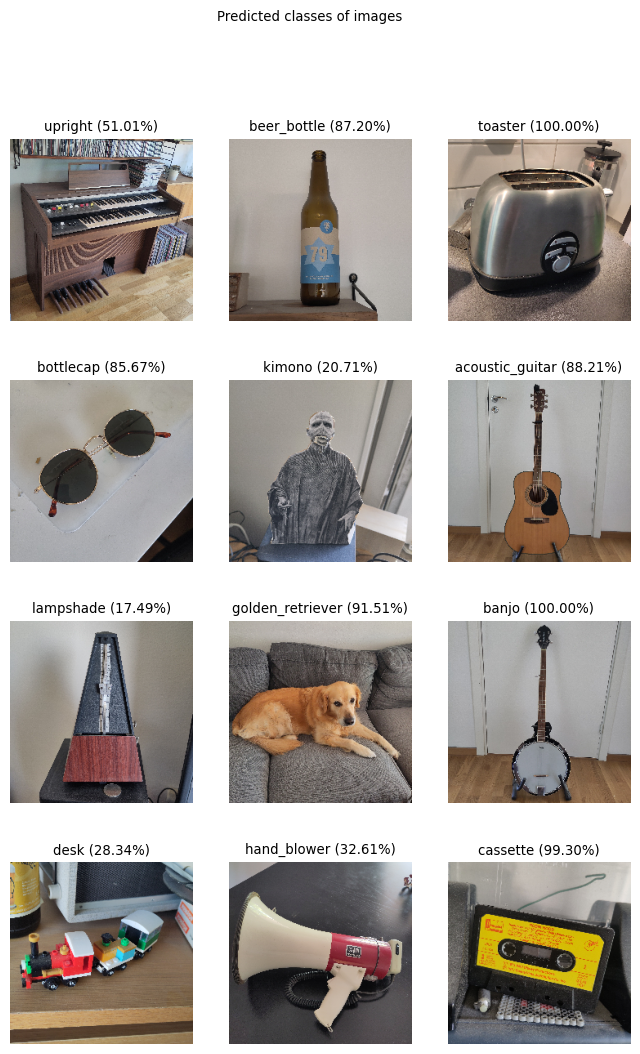

In [5]:
#| label: fig-results-1
#| fig-cap: "Predicted classes of images"
#| include: false

plt.rcParams['font.size'] = 8

fig, axs = plt.subplots(4, 3, figsize=(8, 12))
for ax, img, pred in zip(axs.ravel(), imgs, predictions):
    ax.imshow(img)
    ax.axis("off")
    ax.set(title=
           f'{pred[0, 1]} ({float(pred[0, 2]):.2%})')

fig.suptitle('Predicted classes of images');

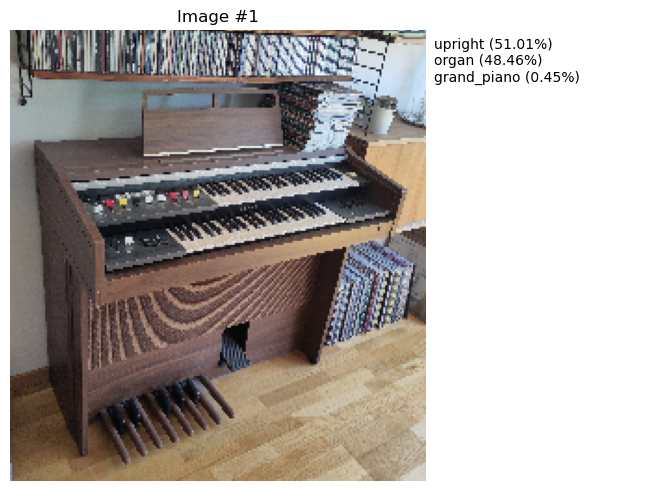

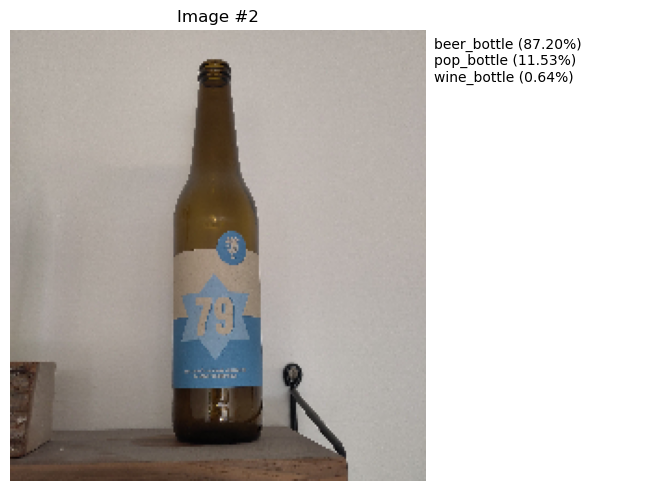

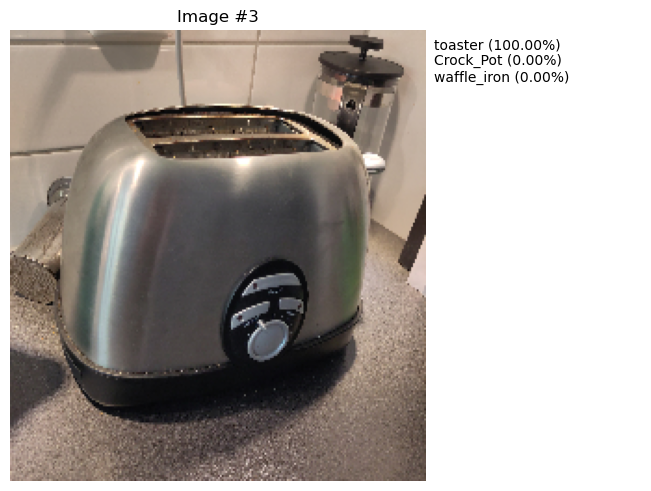

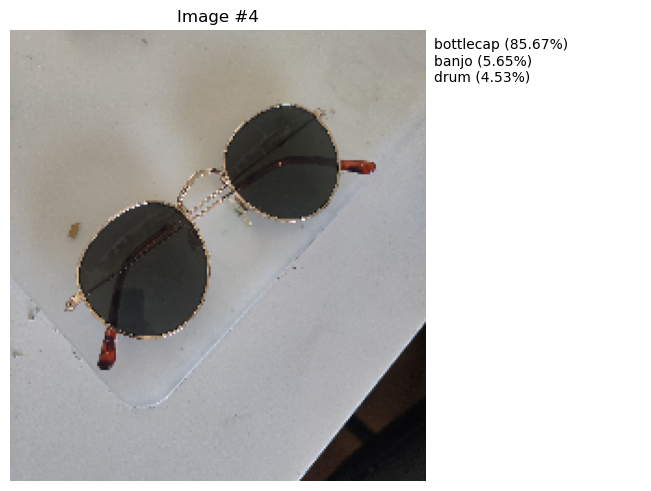

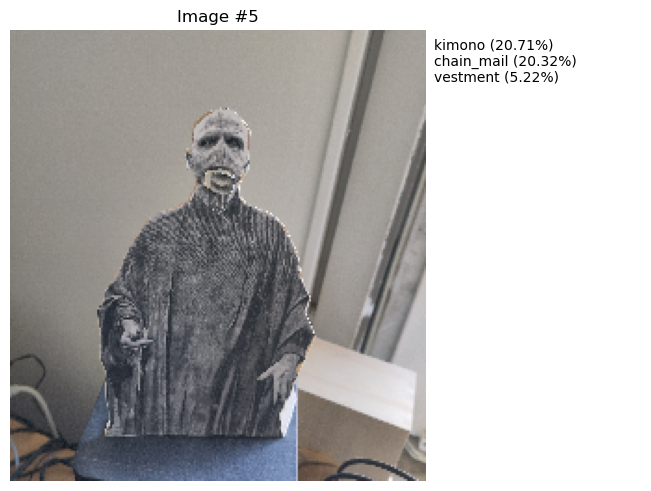

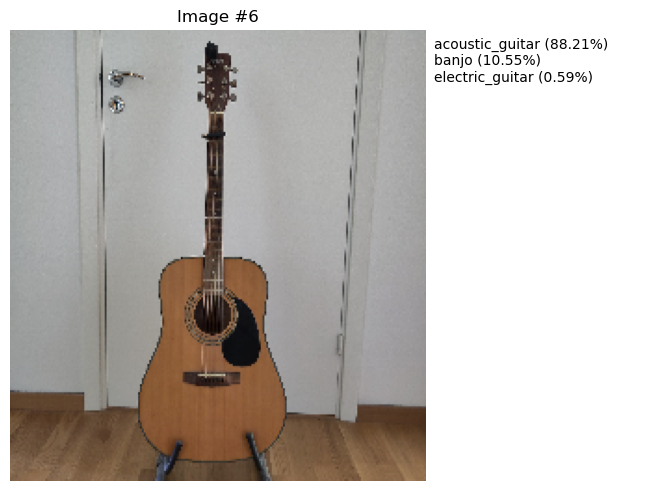

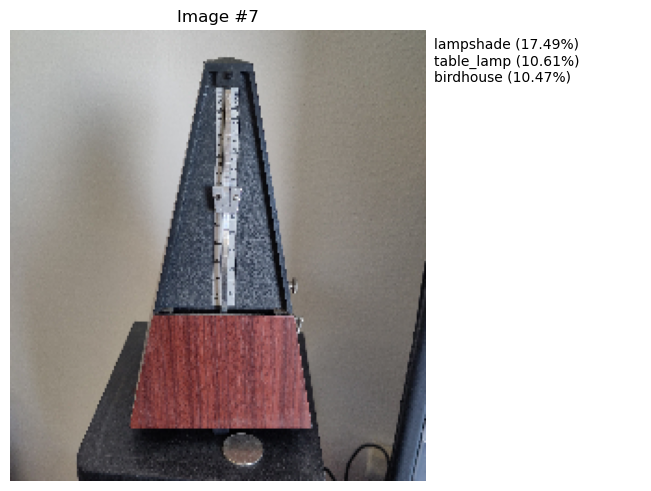

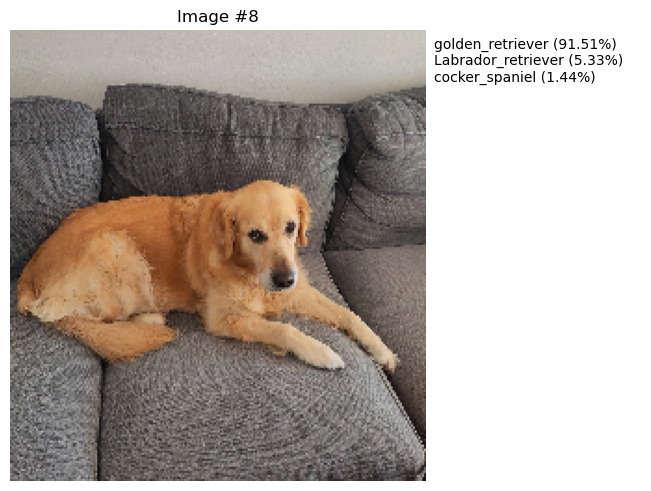

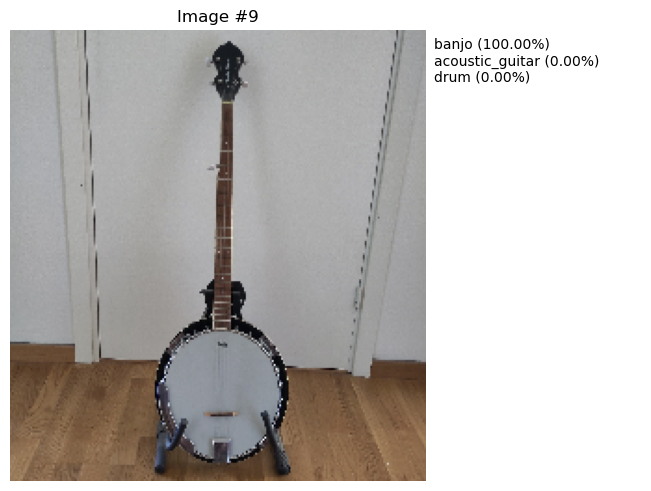

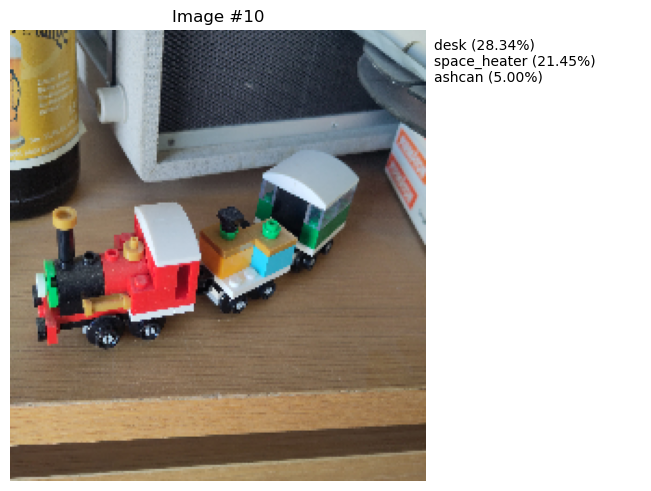

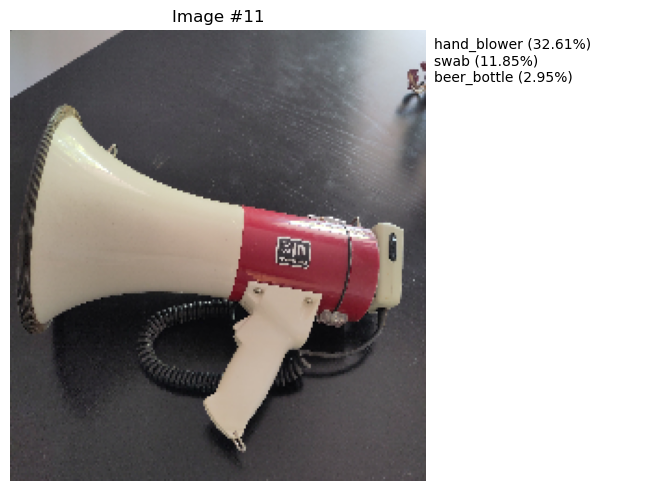

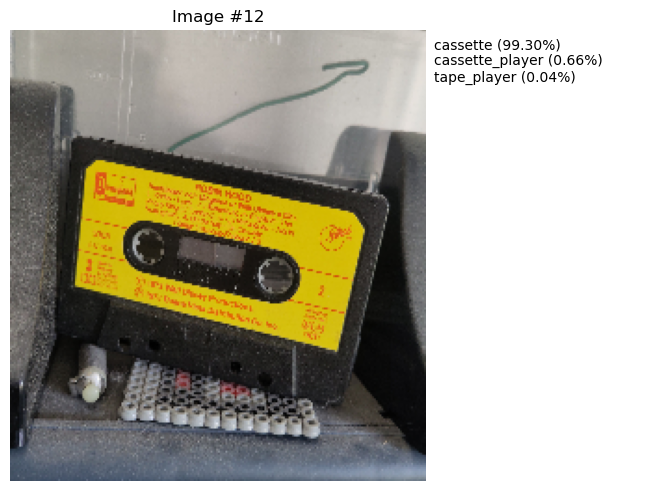

In [6]:
#| label: fig-predictions
#| layout-ncol: 3
#| layout-nrow: 4
#| column: page

from matplotlib.gridspec import GridSpec


plt.rcParams['font.size'] = 10



n = 1

for img, pred in zip(imgs, predictions):
  fig = plt.figure(layout="constrained")
  gs = GridSpec(1, 3, figure=fig)
  output = ''
  for cl in pred:
    output += f'{cl[1]} ({float(cl[2]):.2%})\n'
  img_ax = fig.add_subplot(gs[0, :2])
  img_ax.imshow(img, aspect='auto')
  img_ax.axis("off")
  img_ax.set(title=f'Image #{n}')
  text_ax = fig.add_subplot(gs[0, 2])
  text_ax.text(x=0, y=.85, s=output)
  text_ax.axis("off")
  plt.show()
  n += 1


2. Answer the question: Why is "Pretrained models" a very powerful concept?

I can easily see the benefits of not having to gather, prepare and label the images myself when building an image classifier model. And the concept of course extends beyond image classification, to all sorts of models.